# İş Problemi

Bir oyun şirketi müşterilerinin bazı özelliklerini kullanarak
seviye tabanlı (level based) yeni müşteri tanımları (persona)
oluşturmak ve bu yeni müşteri tanımlarına göre segmentler
oluşturup bu segmentlere göre yeni gelebilecek müşterilerin
şirkete ortalama ne kadar kazandırabileceğini tahmin etmek
istemektedir.

Örneğin:
Türkiye’den IOS kullanıcısı olan 25 yaşındaki bir erkek
kullanıcının ortalama ne kadar kazandırabileceği belirlenmek
isteniyor.

# Veri Seti Hikayesi

Persona.csv veri seti uluslararası bir oyun şirketinin sattığı ürünlerin fiyatlarını ve bu
ürünleri satın alan kullanıcıların bazı demografik bilgilerini barındırmaktadır. Veri
seti her satış işleminde oluşan kayıtlardan meydana gelmektedir. Bunun anlamı
tablo tekilleştirilmemiştir. Diğer bir ifade ile belirli demografik özelliklere sahip bir
kullanıcı birden fazla alışveriş yapmış olabilir.



# Değişkenler

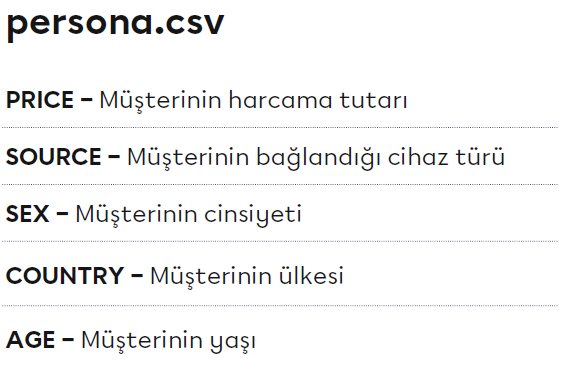

# Proje Görevleri

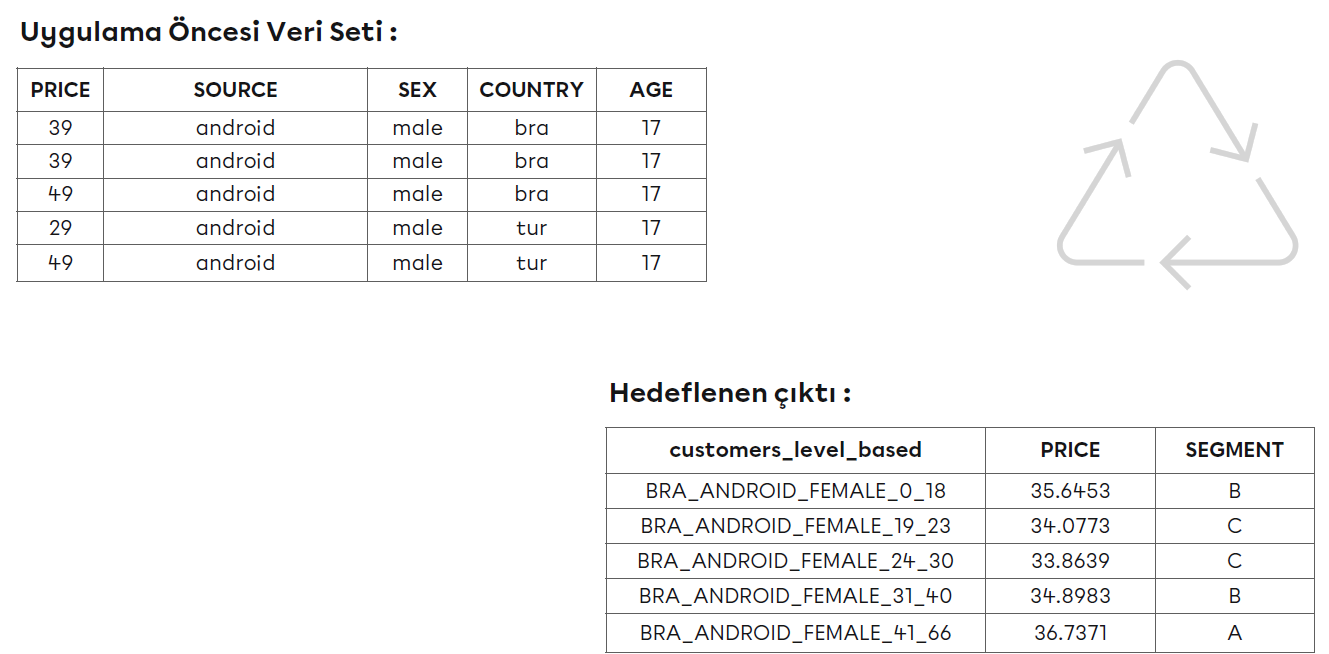

Soru 1: persona.csv dosyasını okutunuz ve veri seti ile ilgili genel bilgileri gösteriniz.

In [1]:
import pandas as pd
pd.set_option("display.max_rows", None)

In [2]:
df= pd.read_csv(r"C:\Users\ceren\Desktop\miuul\persona.csv")

In [3]:
df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.4+ KB


In [5]:
df.shape

(5000, 5)

Soru 2: Kaç unique SOURCE vardır? Frekansları nedir?

In [6]:
df["SOURCE"].nunique()

2

In [7]:
df["SOURCE"].value_counts()

android    2974
ios        2026
Name: SOURCE, dtype: int64

Soru 3: Kaç unique PRICE vardır?

In [8]:
df["SOURCE"].nunique()

2

Soru 4: Hangi PRICE'dan kaçar tane satış gerçekleşmiş?

In [9]:
df["PRICE"].value_counts()

29    1305
39    1260
49    1031
19     992
59     212
9      200
Name: PRICE, dtype: int64

Soru 5: Hangi ülkeden kaçar tane satış olmuş?

In [10]:
df["COUNTRY"].value_counts()

usa    2065
bra    1496
deu     455
tur     451
fra     303
can     230
Name: COUNTRY, dtype: int64

Soru 6: Ülkelere göre satışlardan toplam ne kadar kazanılmış?

In [11]:
df.groupby("COUNTRY").agg({"PRICE":"sum"})

,PRICE
COUNTRY,
bra,51354
can,7730
deu,15485
fra,10177
tur,15689
usa,70225


In [12]:
df.pivot_table(values="PRICE",index="COUNTRY",aggfunc="sum")

,PRICE
COUNTRY,
bra,51354
can,7730
deu,15485
fra,10177
tur,15689
usa,70225


Soru 7: SOURCE türlerine göre satış sayıları nedir?

In [13]:
df["SOURCE"].value_counts()

android    2974
ios        2026
Name: SOURCE, dtype: int64

Soru 8: Ülkelere göre PRICE ortalamaları nedir?

In [14]:
df.groupby("COUNTRY").agg({"PRICE":"mean"})

,PRICE
COUNTRY,
bra,34.327540
can,33.608696
deu,34.032967
fra,33.587459
tur,34.787140
usa,34.007264


Soru 10: COUNTRY-SOURCE kırılımında PRICE ortalamaları nedir?

In [15]:
df.groupby(["COUNTRY","SOURCE"]).agg({"PRICE":"mean"})

PRICE
COUNTRY SOURCE            
bra     android  34.387029
        ios      34.222222
can     android  33.330709
        ios      33.951456
deu     android  33.869888
        ios      34.268817
fra     android  34.312500
        ios      32.776224
tur     android  36.229437
        ios      33.272727
usa     android  33.760357
        ios      34.371703

Görev 2: COUNTRY, SOURCE, SEX, AGE kırılımında ortalama kazançlar nedir?

In [16]:
df.groupby(["COUNTRY","SOURCE","SEX","AGE"]).agg({"PRICE":"mean"})

PRICE
COUNTRY SOURCE  SEX    AGE           
bra     android female 15   38.714286
                       16   35.944444
                       17   35.666667
                       18   32.255814
                       19   35.206897
                       20   31.000000
                       21   37.292683
                       22   34.945946
                       23   31.941176
                       24   36.500000
                       25   35.666667
                       26   33.166667
                       27   26.142857
                       28   22.333333
                       29   37.571429
                       30   45.666667
                       31   35.097561
                       32   39.000000
                       34   24.000000
                       37   33.736842
                       38   34.555556
                       39   43.000000
                       41   32.333333
                       43   44.000000
                       45   33.615385
                       56   37.000000
                male   15   39.344828
                       16   29.666667
                       17   37.157895
                       18   33.054054
                       19   35.216216
                       20   35.400000
                       21   35.250000
                       22   31.000000
                       23   21.500000
                       24   40.428571
                       25   30.428571
                       26   37.095238
                       27   32.636364
                       28   28.230769
                       29   29.714286
                       30   35.363636
                       35   31.500000
                       36   31.857143
                       40   39.625000
                       41   35.666667
                       44   36.500000
                       46   59.000000
                       53   29.000000
        ios     female 15   36.777778
                       16   33.687500
                       17   32.636364
                       18   36.500000
                       19   39.000000
                       20   32.846154
                       22   44.000000
                       23   29.769231
                       24   34.000000
                       25   39.000000
                       26   34.333333
                       27   34.000000
                       28   32.333333
                       29   30.428571
                       31   27.571429
                       33   35.363636
                       34   19.000000
                       35   32.333333
                       37   35.111111
                       42   39.000000
                       45   35.363636
                       46   33.000000
                       54   34.000000
                male   15   36.878788
                       16   33.761905
                       17   35.333333
                       18   32.684211
                       19   34.000000
                       21   31.000000
                       22   37.181818
                       23   34.882353
                       24   33.864865
                       31   29.000000
                       33   37.571429
                       34   34.714286
                       35   36.777778
                       36   22.333333
                       37   29.000000
                       42   30.111111
                       43   42.333333
                       44   33.545455
                       47   19.000000
                       66   30.428571
can     android female 15   25.666667
                       16   29.689655
                       18   37.333333
                       19   32.529412
                       20   31.500000
                       27   19.000000
                       43   34.000000
                male   15   36.000000
                       20   40.111111
                       24   29.769231
                       30   40.250000
                       49   37.571429
    

Görev 3: Çıktıyı PRICE’a göre sıralayınız.

• Önceki sorudaki çıktıyı daha iyi görebilmek için sort_values metodunu azalan olacak şekilde PRICE’a göre uygulayınız.
• Çıktıyı agg_df olarak kaydediniz.

In [17]:
agg_df=df.groupby(["COUNTRY","SOURCE","SEX","AGE"]).agg({"PRICE":"mean"}).sort_values("PRICE" , ascending=False)
agg_df.head()

,,,,PRICE
COUNTRY,SOURCE,SEX,AGE,
bra,android,male,46,59.0
usa,android,male,36,59.0
fra,android,female,24,59.0
usa,ios,male,32,54.0
deu,android,female,36,49.0


• Üçüncü sorunun çıktısında yer alan PRICE dışındaki tüm değişkenler index isimleridir. Bu isimleri değişken isimlerine çeviriniz.

In [18]:
agg_df=agg_df.reset_index()
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,male,46,59.0
1,usa,android,male,36,59.0
2,fra,android,female,24,59.0
3,usa,ios,male,32,54.0
4,deu,android,female,36,49.0


Görev 5: Age değişkenini kategorik değişkene çeviriniz ve agg_df’e ekleyiniz.

• Age sayısal değişkenini kategorik değişkene çeviriniz.
• Aralıkları ikna edici şekilde oluşturunuz.
• Örneğin: ‘0_18', ‘19_23', '24_30', '31_40', '41_70'

In [19]:
# AGE değişkeninin nerelerden bölüneceğini belirtelim:
bins = [0, 18, 23, 30, 40, agg_df["AGE"].max()]
# Bölünen noktalara karşılık isimlendirmelerin ne olacağını ifade edelim:
mylabels = ['0_18', '19_23', '24_30', '31_40', '41_' + str(agg_df["AGE"].max())]

In [20]:
# age'i bölelim:
agg_df["age_cat"] = pd.cut(agg_df["AGE"], bins, labels=mylabels)
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,age_cat
0,bra,android,male,46,59.0,41_66
1,usa,android,male,36,59.0,31_40
2,fra,android,female,24,59.0,24_30
3,usa,ios,male,32,54.0,31_40
4,deu,android,female,36,49.0,31_40


Görev 6: Yeni seviye tabanlı müşterileri (persona) tanımlayınız.

• Yeni seviye tabanlı müşterileri (persona) tanımlayınız ve veri setine değişken olarak ekleyiniz.

• Yeni eklenecek değişkenin adı: customers_level_based

• Önceki soruda elde edeceğiniz çıktıdaki gözlemleri bir araya getirerek customers_level_based değişkenini oluşturmanız gerekmektedir.

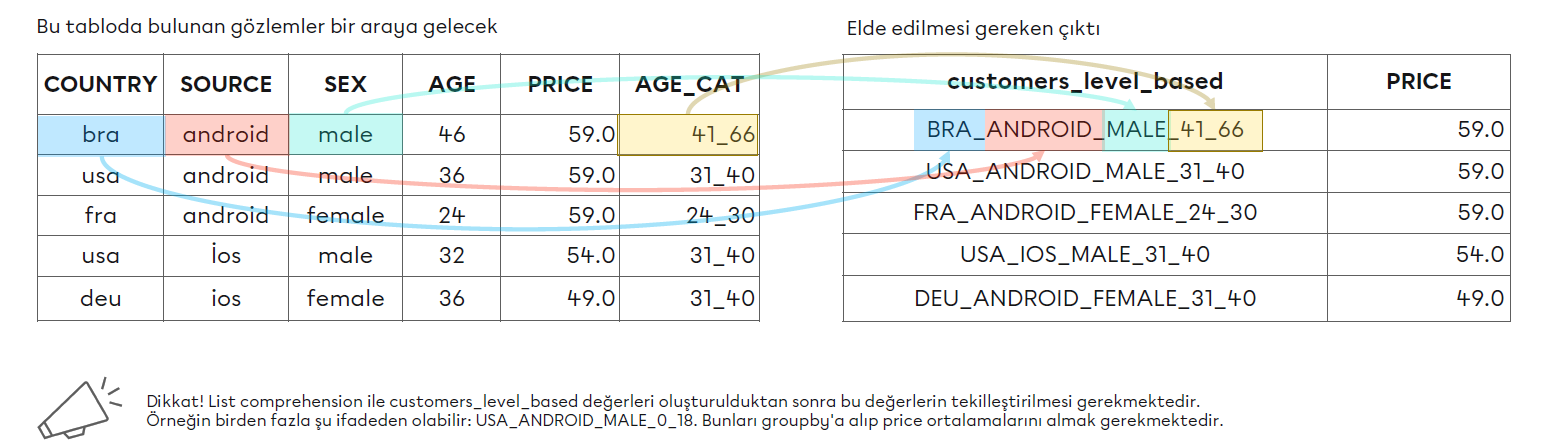

In [21]:
# gözlem değerlerine nasıl erişebiliriz?

for row in agg_df.values:
    print(row)


['bra' 'android' 'male' 46 59.0 '41_66']
['usa' 'android' 'male' 36 59.0 '31_40']
['fra' 'android' 'female' 24 59.0 '24_30']
['usa' 'ios' 'male' 32 54.0 '31_40']
['deu' 'android' 'female' 36 49.0 '31_40']
['deu' 'android' 'female' 51 49.0 '41_66']
['deu' 'ios' 'male' 20 49.0 '19_23']
['usa' 'android' 'female' 47 49.0 '41_66']
['fra' 'ios' 'male' 20 49.0 '19_23']
['usa' 'ios' 'male' 59 46.5 '41_66']
['deu' 'android' 'male' 15 46.5 '0_18']
['bra' 'android' 'female' 30 45.666666666666664 '24_30']
['usa' 'android' 'female' 61 45.666666666666664 '41_66']
['tur' 'ios' 'male' 24 45.0 '24_30']
['deu' 'android' 'male' 34 45.0 '31_40']
['tur' 'ios' 'female' 18 44.0 '0_18']
['bra' 'android' 'female' 43 44.0 '41_66']
['bra' 'ios' 'female' 22 44.0 '19_23']
['tur' 'android' 'female' 32 43.0 '31_40']
['bra' 'android' 'female' 39 43.0 '31_40']
['tur' 'ios' 'male' 37 42.333333333333336 '31_40']
['tur' 'android' 'male' 15 42.333333333333336 '0_18']
['usa' 'ios' 'male' 28 42.333333333333336 '24_30']
['br

In [22]:
 agg_df.columns

Index(['COUNTRY', 'SOURCE', 'SEX', 'AGE', 'PRICE', 'age_cat'], dtype='object')

In [23]:
# COUNTRY, SOURCE, SEX ve age_cat değişkenlerinin DEĞERLERİNİ yan yana koymak ve alt tireyle birleştirmek istiyoruz.
# Bunu list comprehension ile yapabiliriz.
# Yukarıdaki döngüdeki gözlem değerlerinin bize lazım olanlarını seçecek şekilde işlemi gerçekletirelim:
[row[0].upper() + "_" + row[1].upper() + "_" + row[2].upper() + "_" + row[5].upper() for row in agg_df.values]


['BRA_ANDROID_MALE_41_66',
 'USA_ANDROID_MALE_31_40',
 'FRA_ANDROID_FEMALE_24_30',
 'USA_IOS_MALE_31_40',
 'DEU_ANDROID_FEMALE_31_40',
 'DEU_ANDROID_FEMALE_41_66',
 'DEU_IOS_MALE_19_23',
 'USA_ANDROID_FEMALE_41_66',
 'FRA_IOS_MALE_19_23',
 'USA_IOS_MALE_41_66',
 'DEU_ANDROID_MALE_0_18',
 'BRA_ANDROID_FEMALE_24_30',
 'USA_ANDROID_FEMALE_41_66',
 'TUR_IOS_MALE_24_30',
 'DEU_ANDROID_MALE_31_40',
 'TUR_IOS_FEMALE_0_18',
 'BRA_ANDROID_FEMALE_41_66',
 'BRA_IOS_FEMALE_19_23',
 'TUR_ANDROID_FEMALE_31_40',
 'BRA_ANDROID_FEMALE_31_40',
 'TUR_IOS_MALE_31_40',
 'TUR_ANDROID_MALE_0_18',
 'USA_IOS_MALE_24_30',
 'BRA_IOS_MALE_41_66',
 'DEU_ANDROID_MALE_19_23',
 'USA_IOS_MALE_24_30',
 'TUR_ANDROID_FEMALE_0_18',
 'USA_ANDROID_MALE_41_66',
 'TUR_ANDROID_MALE_24_30',
 'USA_IOS_FEMALE_41_66',
 'FRA_ANDROID_MALE_19_23',
 'USA_IOS_MALE_31_40',
 'TUR_ANDROID_FEMALE_0_18',
 'FRA_IOS_MALE_0_18',
 'TUR_IOS_FEMALE_19_23',
 'TUR_ANDROID_FEMALE_31_40',
 'TUR_ANDROID_MALE_24_30',
 'FRA_ANDROID_MALE_19_23',
 'BRA_AN

In [25]:
# Veri setine ekleyelim:
agg_df["customers_level_based"] = [row[0].upper() + "_" + row[1].upper() + "_" + row[2].upper() + "_" + row[5].upper() for row in agg_df.values]
agg_df.head()


,COUNTRY,SOURCE,SEX,AGE,PRICE,age_cat,customers_level_based
0,bra,android,male,46,59.0,41_66,BRA_ANDROID_MALE_41_66
1,usa,android,male,36,59.0,31_40,USA_ANDROID_MALE_31_40
2,fra,android,female,24,59.0,24_30,FRA_ANDROID_FEMALE_24_30
3,usa,ios,male,32,54.0,31_40,USA_IOS_MALE_31_40
4,deu,android,female,36,49.0,31_40,DEU_ANDROID_FEMALE_31_40


In [26]:
# Gereksiz değişkenleri çıkaralım:
agg_df = agg_df[["customers_level_based", "PRICE"]]
agg_df.head()

,customers_level_based,PRICE
0,BRA_ANDROID_MALE_41_66,59.0
1,USA_ANDROID_MALE_31_40,59.0
2,FRA_ANDROID_FEMALE_24_30,59.0
3,USA_IOS_MALE_31_40,54.0
4,DEU_ANDROID_FEMALE_31_40,49.0


In [27]:
# Amacımıza bir adım daha yaklaştık.
# Burada ufak bir problem var. Birçok aynı segment olacak.
# örneğin USA_ANDROID_MALE_0_18 segmentinden birçok sayıda olabilir.
# kontrol edelim:
agg_df["customers_level_based"].value_counts()


USA_IOS_FEMALE_24_30        7
USA_ANDROID_MALE_41_66      7
BRA_ANDROID_FEMALE_24_30    7
USA_ANDROID_MALE_24_30      7
BRA_ANDROID_MALE_24_30      7
USA_ANDROID_MALE_31_40      6
USA_IOS_MALE_24_30          6
BRA_IOS_FEMALE_24_30        6
USA_ANDROID_FEMALE_24_30    6
BRA_ANDROID_FEMALE_31_40    6
BRA_IOS_MALE_31_40          6
USA_ANDROID_FEMALE_19_23    5
BRA_IOS_FEMALE_31_40        5
DEU_ANDROID_MALE_31_40      5
USA_IOS_FEMALE_19_23        5
BRA_ANDROID_MALE_19_23      5
USA_IOS_FEMALE_41_66        5
USA_ANDROID_MALE_19_23      5
USA_ANDROID_FEMALE_41_66    5
USA_IOS_MALE_31_40          5
TUR_IOS_FEMALE_19_23        5
BRA_IOS_MALE_41_66          5
BRA_ANDROID_FEMALE_19_23    5
USA_ANDROID_FEMALE_31_40    5
USA_IOS_MALE_41_66          5
DEU_ANDROID_MALE_19_23      4
DEU_ANDROID_FEMALE_24_30    4
BRA_ANDROID_MALE_41_66      4
BRA_IOS_MALE_0_18           4
BRA_IOS_FEMALE_0_18         4
TUR_ANDROID_MALE_24_30      4
BRA_IOS_FEMALE_41_66        4
USA_IOS_MALE_0_18           4
BRA_IOS_FE

In [30]:
# Bu sebeple segmentlere göre groupby yaptıktan sonra price ortalamalarını almalı ve segmentleri tekilleştirmeliyiz.
agg_df = agg_df.groupby("customers_level_based").agg({"PRICE": "mean"})
# customers_level_based index'te yer almaktadır. Bunu değişkene çevirelim.
agg_df = agg_df.reset_index()
agg_df.head()
agg_df["customers_level_based"].value_counts()


CAN_IOS_MALE_31_40          1
USA_IOS_FEMALE_0_18         1
FRA_ANDROID_FEMALE_24_30    1
TUR_ANDROID_FEMALE_41_66    1
TUR_IOS_FEMALE_41_66        1
USA_IOS_MALE_0_18           1
BRA_IOS_MALE_0_18           1
DEU_IOS_MALE_19_23          1
BRA_IOS_MALE_31_40          1
USA_ANDROID_FEMALE_0_18     1
FRA_IOS_FEMALE_24_30        1
DEU_IOS_FEMALE_0_18         1
DEU_IOS_FEMALE_24_30        1
CAN_IOS_MALE_24_30          1
DEU_ANDROID_FEMALE_41_66    1
TUR_ANDROID_FEMALE_0_18     1
DEU_ANDROID_FEMALE_24_30    1
CAN_IOS_MALE_41_66          1
TUR_ANDROID_FEMALE_31_40    1
FRA_ANDROID_MALE_31_40      1
DEU_ANDROID_FEMALE_19_23    1
DEU_IOS_MALE_24_30          1
TUR_ANDROID_MALE_0_18       1
BRA_IOS_FEMALE_41_66        1
TUR_IOS_FEMALE_0_18         1
TUR_ANDROID_MALE_41_66      1
FRA_IOS_MALE_41_66          1
CAN_ANDROID_MALE_41_66      1
TUR_ANDROID_FEMALE_24_30    1
USA_IOS_MALE_41_66          1
BRA_IOS_MALE_41_66          1
CAN_ANDROID_FEMALE_19_23    1
FRA_ANDROID_FEMALE_0_18     1
USA_IOS_MA

In [31]:
agg_df.head()

,customers_level_based,PRICE
0,BRA_ANDROID_FEMALE_0_18,35.645303
1,BRA_ANDROID_FEMALE_19_23,34.077340
2,BRA_ANDROID_FEMALE_24_30,33.863946
3,BRA_ANDROID_FEMALE_31_40,34.898326
4,BRA_ANDROID_FEMALE_41_66,36.737179


GÖREV 7: Yeni müşterileri (USA_ANDROID_MALE_0_18) segmentlere ayırınız.

• Yeni müşterileri (Örnek: USA_ANDROID_MALE_0_18) PRICE’a göre 4 segmente ayırınız.

• Segmentleri SEGMENT isimlendirmesi ile değişken olarak agg_df’e ekleyiniz.

• Segmentleri betimleyiniz (Segmentlere göre group by yapıp price mean, max, sum’larını alınız).

In [32]:
agg_df["SEGMENT"] = pd.qcut(agg_df["PRICE"], 4, labels=["D", "C", "B", "A"]) #qcut önce sıralar sonra kendi kendine böler.
agg_df.head(30)

,customers_level_based,PRICE,SEGMENT
0,BRA_ANDROID_FEMALE_0_18,35.645303,B
1,BRA_ANDROID_FEMALE_19_23,34.077340,C
2,BRA_ANDROID_FEMALE_24_30,33.863946,C
3,BRA_ANDROID_FEMALE_31_40,34.898326,B
4,BRA_ANDROID_FEMALE_41_66,36.737179,A
5,BRA_ANDROID_MALE_0_18,34.805861,B
6,BRA_ANDROID_MALE_19_23,31.673243,D
7,BRA_ANDROID_MALE_24_30,33.413919,C
8,BRA_ANDROID_MALE_31_40,34.327381,B
9,BRA_ANDROID_MALE_41_66,40.041667,A


In [33]:
agg_df.groupby("SEGMENT").agg({"PRICE": "mean"})

,PRICE
SEGMENT,
D,29.206780
C,33.509674
B,34.999645
A,38.691234


GÖREV 8: Yeni gelen müşterileri sınıflandırınız ne kadar gelir getirebileceğini tahmin ediniz.

In [34]:
# 33 yaşında ANDROID kullanan bir Türk kadını hangi segmente aittir ve ortalama ne kadar gelir kazandırması beklenir?
new_user = "TUR_ANDROID_FEMALE_31_40"
agg_df[agg_df["customers_level_based"] == new_user]

,customers_level_based,PRICE,SEGMENT
72,TUR_ANDROID_FEMALE_31_40,41.833333,A


In [35]:
# 35 yaşında IOS kullanan bir Fransız kadını hangi segmente ve ortalama ne kadar gelir kazandırması beklenir?
new_user = "FRA_IOS_FEMALE_31_40"
agg_df[agg_df["customers_level_based"] == new_user]

,customers_level_based,PRICE,SEGMENT
63,FRA_IOS_FEMALE_31_40,32.818182,C


In [ ]:
#argparse metodu; terminalden yazarken fonksiyonun çıktı vermesine yarar